<h1>1. Import Libraries</h1>

In [34]:
import pandas as pd
import random
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

<h1>2. Load and Preprocess Data</h1>

In [35]:
# Given data
data = {
    "Student_ID": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "High_School_Stream": ["PCM", "PCM", "PCM", "PCB", "MEG", "MEG", "MPG", "MPG", "HGL"],
    "Best_Subjects": [
        "Physics, Math", "Physics, Math", "Physics, Math", "Biology, Chemistry",
        "Math, Economics", "Math, Economics", "Math, Physics", "Math, Physics", "History, Literature"
    ],
    "Physics": [85, 80, 78, 72, None, None, 74, 72, None],
    "Math": [90, 88, 85, None, 78, 75, 74, 73, None],
    "Chemistry": [78, 75, 72, 80, None, None, None, None, None],
    "Biology": [None, None, None, 85, None, None, None, None, None],
    "Economics": [None, None, None, None, 75, 72, None, None, None],
    "Geography": [None, None, None, None, 80, 78, 75, 74, None],
    "History": [None, None, None, None, None, None, None, None, 80],
    "Literature": [None, None, None, None, None, None, None, None, 75],
    "Admitted_Field": [
        "IT", "ELECTRONICS AND TELECOMMUNICATION", "ELECTRICAL", "ANIMAL HEALTH",
        "HIGHWAY", "CONSTRUCTION TECHNOLOGY", "QUANTITY SURVEY", "LAND SURVEY", "HOSPITALITY"
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Fill NaN values with 0 for subject columns
df.iloc[:, 3:11] = df.iloc[:, 3:11].fillna(0)

# Recommended field is the same as admitted field
df["Recommended_Field"] = df["Admitted_Field"]

# Generate 2000 records
records = []
for i in range(2000):
    index = random.randint(0, len(df) - 1)
    record = df.iloc[index].to_dict()
    record["Student_ID"] = i + 1  # Assign a new Student_ID
    records.append(record)

# Convert to DataFrame
expanded_df = pd.DataFrame(records)

# Save to CSV
expanded_df.to_csv("dataset/generated_student_records.csv", index=False)

print("2000 records generated and saved to 'generated_student_records.csv'")

2000 records generated and saved to 'generated_student_records.csv'


<h1>3. Feature Engineering</h1>

In [36]:
# Load the dataset
df = pd.read_csv('dataset/generated_student_records.csv')

In [37]:
df.head()

,Student_ID,High_School_Stream,Best_Subjects,Physics,Math,Chemistry,Biology,Economics,Geography,History,Literature,Admitted_Field,Recommended_Field
0,1,PCM,"Physics, Math",85.0,90.0,78.0,0.0,0.0,0.0,0.0,0.0,IT,IT
1,2,MPG,"Math, Physics",74.0,74.0,0.0,0.0,0.0,75.0,0.0,0.0,QUANTITY SURVEY,QUANTITY SURVEY
2,3,MEG,"Math, Economics",0.0,75.0,0.0,0.0,72.0,78.0,0.0,0.0,CONSTRUCTION TECHNOLOGY,CONSTRUCTION TECHNOLOGY
3,4,HGL,"History, Literature",0.0,0.0,0.0,0.0,0.0,0.0,80.0,75.0,HOSPITALITY,HOSPITALITY
4,5,MPG,"Math, Physics",72.0,73.0,0.0,0.0,0.0,74.0,0.0,0.0,LAND SURVEY,LAND SURVEY


In [38]:

# Check for missing values
df.isnull().sum()


Student_ID            0
High_School_Stream    0
Best_Subjects         0
Physics               0
Math                  0
Chemistry             0
Biology               0
Economics             0
Geography             0
History               0
Literature            0
Admitted_Field        0
Recommended_Field     0
dtype: int64

In [39]:

# Check for duplicates
df.duplicated().sum()


np.int64(0)

In [40]:

# Descriptive statistics for numerical columns
df.describe()

,Student_ID,Physics,Math,Chemistry,Biology,Economics,Geography,History,Literature
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,50.775000,61.586500,33.863500,9.605000,16.018500,33.337000,9.800000,9.187500
std,577.494589,36.660392,34.671048,37.996286,26.917118,30.398836,38.113577,26.235551,24.595829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.750000,0.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.500000,72.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1500.250000,78.000000,85.000000,75.000000,0.000000,0.000000,75.000000,0.000000,0.000000
max,2000.000000,85.000000,90.000000,80.000000,85.000000,75.000000,80.000000,80.000000,75.000000


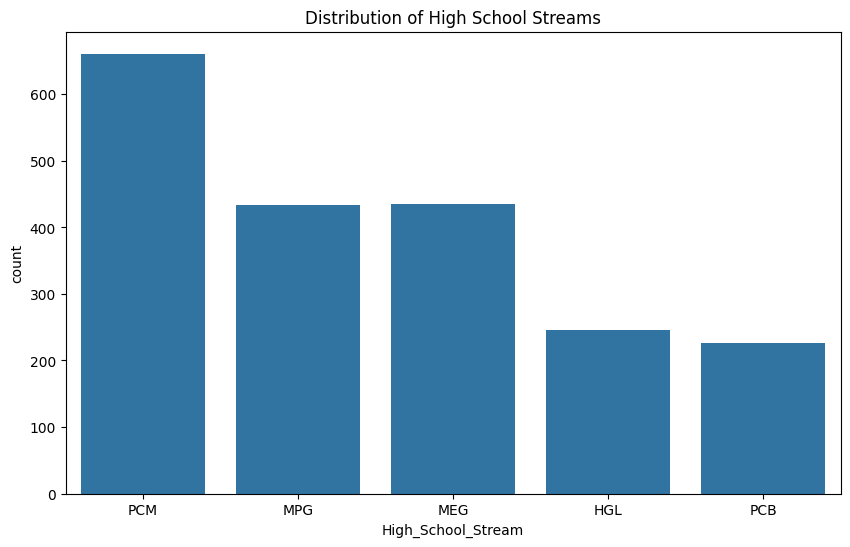

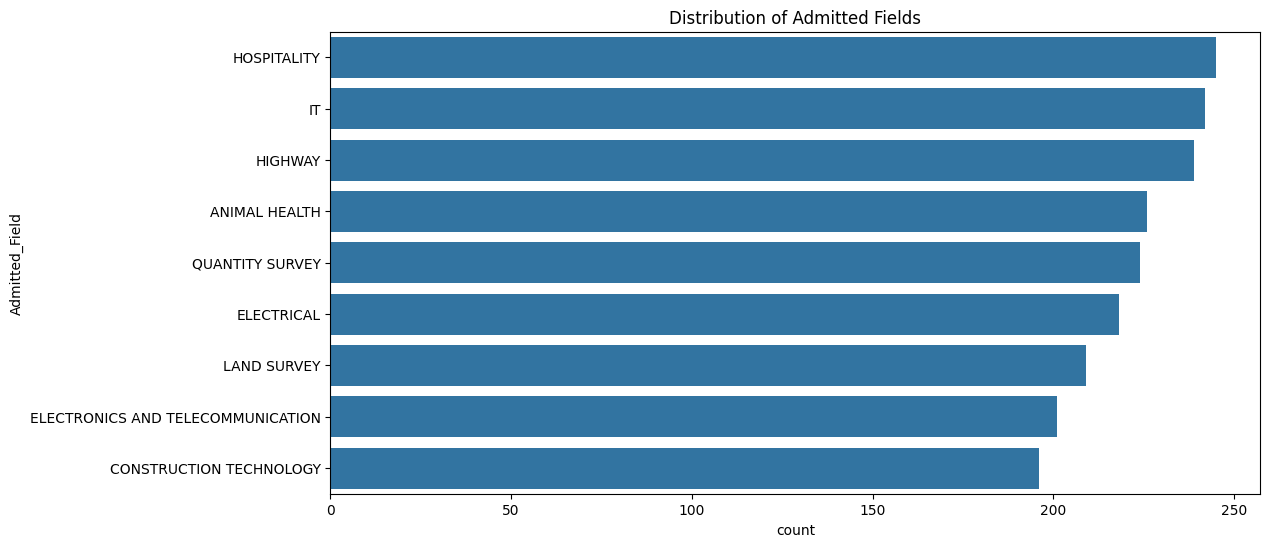

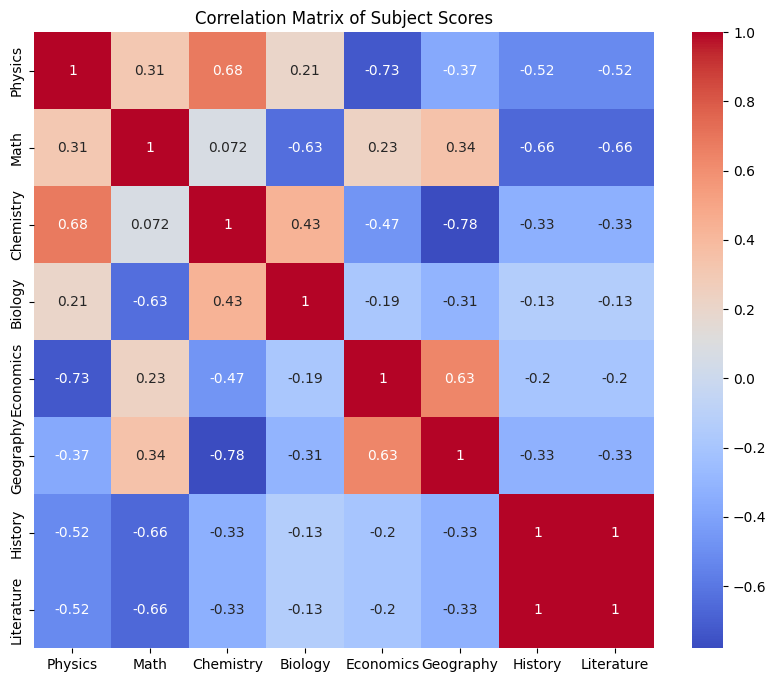

In [41]:
# Distribution of High_School_Stream
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='High_School_Stream')
plt.title('Distribution of High School Streams')
plt.show()

# Distribution of Admitted_Field
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Admitted_Field', order=df['Admitted_Field'].value_counts().index)
plt.title('Distribution of Admitted Fields')
plt.show()

# Distribution of subject scores
subject_columns = ['Physics', 'Math', 'Chemistry', 'Biology', 'Economics', 'Geography', 'History','Literature']

# Correlation matrix for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[subject_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Subject Scores')
plt.show()

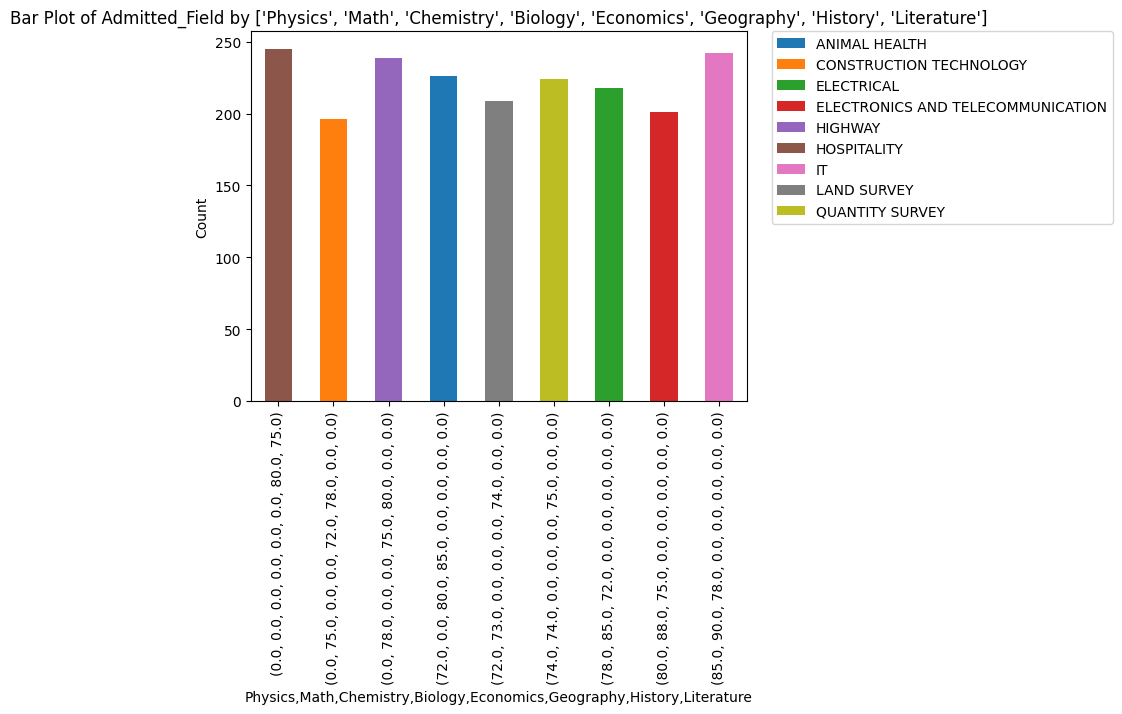

In [42]:
def discrete_var_barplot(x, y, data):
    data.groupby(x)[y].value_counts().unstack().plot(kind='bar', stacked=True)
    plt.ylabel('Count')
    plt.title(f'Bar Plot of {y} by {x}')
    # plt.legend(loc='lower right')  # Place the legend at the bottom right
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

discrete_var_barplot(x=subject_columns, y='Admitted_Field', data=df)

In [43]:
# One-hot encode High_School_Stream
encoder = OneHotEncoder(sparse_output=False, drop="first")
stream_encoded = encoder.fit_transform(df[["High_School_Stream"]])
stream_encoded_df = pd.DataFrame(stream_encoded, columns=encoder.get_feature_names_out(["High_School_Stream"]))

# Combine encoded features with subject scores
X = pd.concat([stream_encoded_df, df.iloc[:, 3:11]], axis=1)

# Encode Admitted_Field (target variable)
field_encoder = LabelEncoder()
y = field_encoder.fit_transform(df["Admitted_Field"])

# Include 'Student_ID' in the features (X) for tracking purposes
X = pd.concat([df[["Student_ID"]], X], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
df.head()

,Student_ID,High_School_Stream,Best_Subjects,Physics,Math,Chemistry,Biology,Economics,Geography,History,Literature,Admitted_Field,Recommended_Field
0,1,PCM,"Physics, Math",85.0,90.0,78.0,0.0,0.0,0.0,0.0,0.0,IT,IT
1,2,MPG,"Math, Physics",74.0,74.0,0.0,0.0,0.0,75.0,0.0,0.0,QUANTITY SURVEY,QUANTITY SURVEY
2,3,MEG,"Math, Economics",0.0,75.0,0.0,0.0,72.0,78.0,0.0,0.0,CONSTRUCTION TECHNOLOGY,CONSTRUCTION TECHNOLOGY
3,4,HGL,"History, Literature",0.0,0.0,0.0,0.0,0.0,0.0,80.0,75.0,HOSPITALITY,HOSPITALITY
4,5,MPG,"Math, Physics",72.0,73.0,0.0,0.0,0.0,74.0,0.0,0.0,LAND SURVEY,LAND SURVEY


In [45]:
df.head()

,Student_ID,High_School_Stream,Best_Subjects,Physics,Math,Chemistry,Biology,Economics,Geography,History,Literature,Admitted_Field,Recommended_Field
0,1,PCM,"Physics, Math",85.0,90.0,78.0,0.0,0.0,0.0,0.0,0.0,IT,IT
1,2,MPG,"Math, Physics",74.0,74.0,0.0,0.0,0.0,75.0,0.0,0.0,QUANTITY SURVEY,QUANTITY SURVEY
2,3,MEG,"Math, Economics",0.0,75.0,0.0,0.0,72.0,78.0,0.0,0.0,CONSTRUCTION TECHNOLOGY,CONSTRUCTION TECHNOLOGY
3,4,HGL,"History, Literature",0.0,0.0,0.0,0.0,0.0,0.0,80.0,75.0,HOSPITALITY,HOSPITALITY
4,5,MPG,"Math, Physics",72.0,73.0,0.0,0.0,0.0,74.0,0.0,0.0,LAND SURVEY,LAND SURVEY


<h1>4. Train and Evaluate Models</>

In [46]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train.drop(columns=["Student_ID"]), y_train)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train.drop(columns=["Student_ID"]), y_train)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test.drop(columns=["Student_ID"]))
y_pred_rf_labels = field_encoder.inverse_transform(y_pred_rf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

# Evaluate Decision Tree
y_pred_dt = dt_model.predict(X_test.drop(columns=["Student_ID"]))
y_pred_dt_labels = field_encoder.inverse_transform(y_pred_dt)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")



Random Forest Accuracy: 100.00%
Decision Tree Accuracy: 100.00%


<h1>5. Save the Better-Performing Model</h1>

In [47]:
# Save the better-performing model
if rf_accuracy > dt_accuracy:
    print("Random Forest performs better. Saving Random Forest model...")
    joblib.dump(rf_model, "model/random_forest_model.pkl")
    joblib.dump(encoder, "model/one_hot_encoder.pkl")
    joblib.dump(field_encoder, "model/label_encoder.pkl")
else:
    print("Decision Tree performs better. Saving Decision Tree model...")
    joblib.dump(dt_model, "model/decision_tree_model.pkl")
    joblib.dump(encoder, "model/one_hot_encoder.pkl")
    joblib.dump(field_encoder, "model/label_encoder.pkl")



Decision Tree performs better. Saving Decision Tree model...


<h1>6. Check for Overfitting</h1>

In [48]:
from sklearn.metrics import log_loss

def check_overfitting(model, X_train, y_train, X_test, y_test):
    # Calculate training and testing accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train.drop(columns=["Student_ID"])))
    test_accuracy = accuracy_score(y_test, model.predict(X_test.drop(columns=["Student_ID"])))
    
    # Calculate training and testing loss (log loss)
    y_train_pred_proba = model.predict_proba(X_train.drop(columns=["Student_ID"]))
    y_test_pred_proba = model.predict_proba(X_test.drop(columns=["Student_ID"]))
    
    train_loss = log_loss(y_train, y_train_pred_proba)
    test_loss = log_loss(y_test, y_test_pred_proba)
    
    # Print results
    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Training Loss (Log Loss): {train_loss:.4f}")
    print(f"Testing Loss (Log Loss): {test_loss:.4f}")
    
    # Check for overfitting
    if train_accuracy > test_accuracy:
        print("Warning: The model may be overfitting.")
    else:
        print("No significant overfitting detected.")

# Check overfitting for Decision Tree
print("\nChecking overfitting for Decision Tree:")
check_overfitting(dt_model, X_train, y_train, X_test, y_test)

# Check overfitting for Random Forest
print("\nChecking overfitting for Random Forest:")
check_overfitting(rf_model, X_train, y_train, X_test, y_test)


Checking overfitting for Decision Tree:
Training Accuracy: 100.00%
Testing Accuracy: 100.00%
Training Loss (Log Loss): 0.0000
Testing Loss (Log Loss): 0.0000
No significant overfitting detected.

Checking overfitting for Random Forest:
Training Accuracy: 100.00%
Testing Accuracy: 100.00%
Training Loss (Log Loss): 0.0000
Testing Loss (Log Loss): 0.0000
No significant overfitting detected.


<h1>7. Display Classification Report and Confusion Matrix</h1>


Classification Report for Decision Tree:
                                   precision    recall  f1-score   support

                    ANIMAL HEALTH       1.00      1.00      1.00        38
          CONSTRUCTION TECHNOLOGY       1.00      1.00      1.00        36
                       ELECTRICAL       1.00      1.00      1.00        50
ELECTRONICS AND TELECOMMUNICATION       1.00      1.00      1.00        31
                          HIGHWAY       1.00      1.00      1.00        62
                      HOSPITALITY       1.00      1.00      1.00        44
                               IT       1.00      1.00      1.00        59
                      LAND SURVEY       1.00      1.00      1.00        38
                  QUANTITY SURVEY       1.00      1.00      1.00        42

                         accuracy                           1.00       400
                        macro avg       1.00      1.00      1.00       400
                     weighted avg       1.00      1.00  

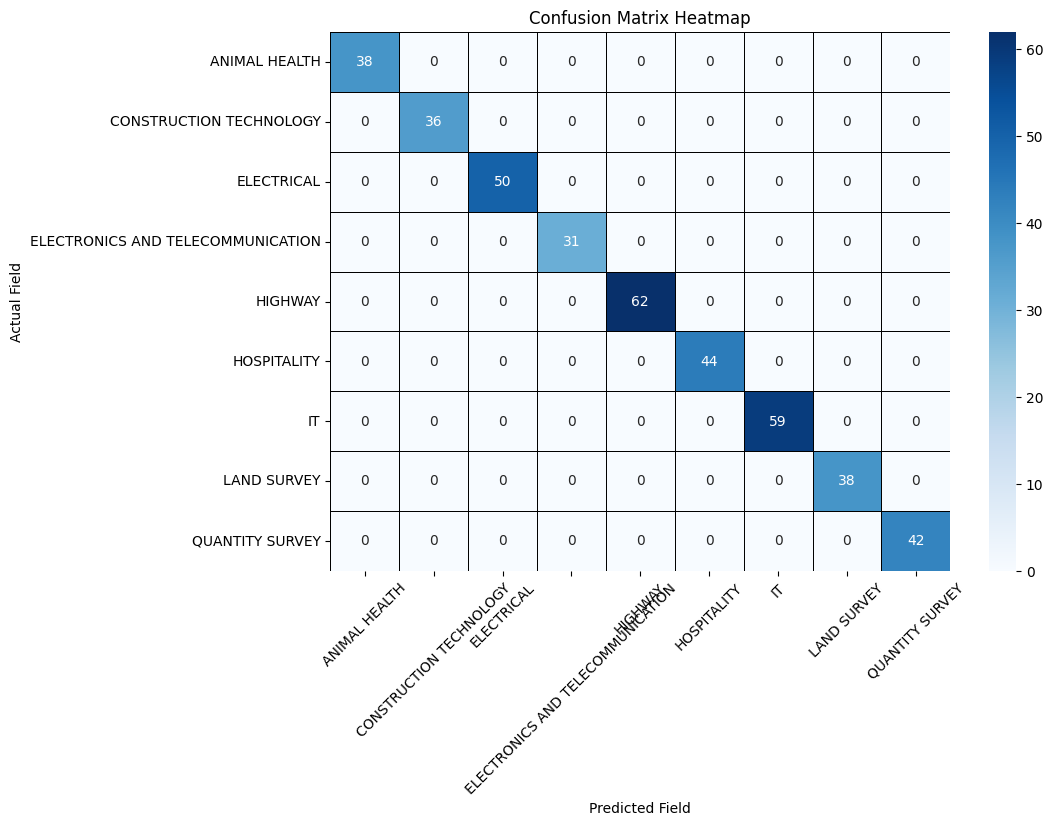

In [49]:
# Display classification report and confusion matrix for the better model
if rf_accuracy > dt_accuracy:
    print("\nClassification Report for Random Forest:")
    print(classification_report(y_test, y_pred_rf, target_names=field_encoder.classes_))

    cm = confusion_matrix(y_test, y_pred_rf, labels=field_encoder.transform(field_encoder.classes_))
else:
    print("\nClassification Report for Decision Tree:")
    print(classification_report(y_test, y_pred_dt, target_names=field_encoder.classes_))

    cm = confusion_matrix(y_test, y_pred_dt, labels=field_encoder.transform(field_encoder.classes_))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='black',
            xticklabels=field_encoder.classes_, yticklabels=field_encoder.classes_)
plt.xlabel('Predicted Field')
plt.ylabel('Actual Field')
plt.title('Confusion Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


Classification Report for Random Forest:
                                   precision    recall  f1-score   support

                    ANIMAL HEALTH       1.00      1.00      1.00        38
          CONSTRUCTION TECHNOLOGY       1.00      1.00      1.00        36
                       ELECTRICAL       1.00      1.00      1.00        50
ELECTRONICS AND TELECOMMUNICATION       1.00      1.00      1.00        31
                          HIGHWAY       1.00      1.00      1.00        62
                      HOSPITALITY       1.00      1.00      1.00        44
                               IT       1.00      1.00      1.00        59
                      LAND SURVEY       1.00      1.00      1.00        38
                  QUANTITY SURVEY       1.00      1.00      1.00        42

                         accuracy                           1.00       400
                        macro avg       1.00      1.00      1.00       400
                     weighted avg       1.00      1.00  

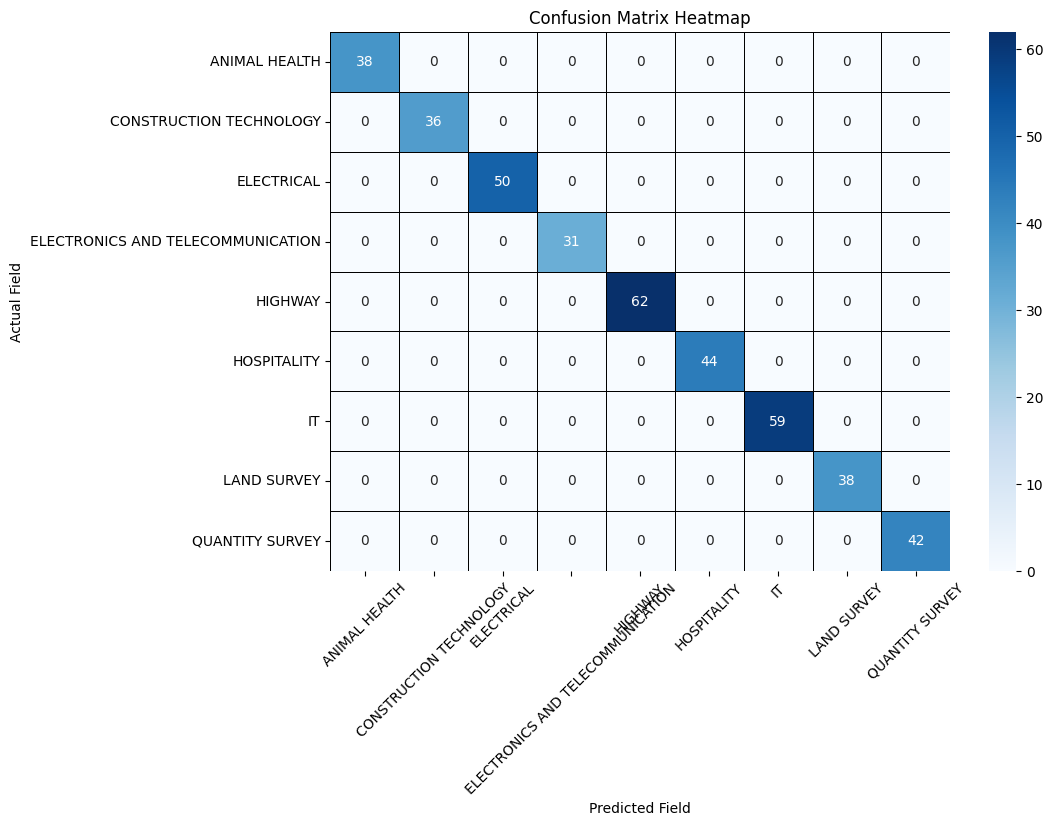

In [50]:
# Display classification report and confusion matrix for Random Forest
if rf_accuracy > dt_accuracy:
    print("\nClassification Report for Decision Tree:")
    print(classification_report(y_test, y_pred_dt, target_names=field_encoder.classes_))

    cm = confusion_matrix(y_test, y_pred_dt, labels=field_encoder.transform(field_encoder.classes_))

else:
    
    print("\nClassification Report for Random Forest:")
    print(classification_report(y_test, y_pred_rf, target_names=field_encoder.classes_))

    cm = confusion_matrix(y_test, y_pred_rf, labels=field_encoder.transform(field_encoder.classes_))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='black',
            xticklabels=field_encoder.classes_, yticklabels=field_encoder.classes_)
plt.xlabel('Predicted Field')
plt.ylabel('Actual Field')
plt.title('Confusion Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

<h1>8. Make Predictions for User Input</h1>

In [51]:
X_test.head(3)

,Student_ID,High_School_Stream_MEG,High_School_Stream_MPG,High_School_Stream_PCB,High_School_Stream_PCM,Physics,Math,Chemistry,Biology,Economics,Geography,History,Literature
1860,1861,0.0,0.0,0.0,1.0,80.0,88.0,75.0,0.0,0.0,0.0,0.0,0.0
353,354,0.0,0.0,0.0,1.0,85.0,90.0,78.0,0.0,0.0,0.0,0.0,0.0
1333,1334,0.0,1.0,0.0,0.0,74.0,74.0,0.0,0.0,0.0,75.0,0.0,0.0


In [52]:
y_test

array([3, 6, 8, 1, 3, 1, 2, 6, 3, 2, 7, 1, 7, 1, 2, 7, 4, 7, 6, 7, 5, 2,
       6, 5, 6, 6, 5, 6, 2, 4, 5, 8, 3, 8, 6, 6, 1, 4, 5, 4, 2, 3, 6, 3,
       0, 8, 0, 2, 0, 7, 8, 3, 5, 6, 0, 3, 8, 4, 2, 2, 4, 5, 7, 6, 5, 2,
       4, 5, 5, 1, 5, 7, 8, 5, 4, 7, 6, 8, 6, 7, 3, 4, 8, 3, 5, 0, 5, 6,
       4, 7, 5, 4, 7, 5, 8, 2, 4, 2, 2, 2, 2, 5, 4, 4, 7, 3, 7, 6, 4, 5,
       5, 6, 1, 5, 0, 4, 6, 6, 2, 2, 4, 6, 1, 5, 2, 7, 4, 0, 1, 6, 8, 2,
       6, 8, 8, 4, 6, 2, 4, 8, 4, 4, 8, 3, 7, 5, 0, 2, 5, 5, 6, 6, 5, 0,
       8, 2, 0, 4, 7, 3, 0, 3, 3, 6, 8, 0, 7, 4, 1, 6, 8, 6, 6, 6, 4, 1,
       8, 5, 6, 2, 4, 2, 4, 7, 5, 6, 8, 8, 1, 1, 0, 6, 0, 7, 1, 2, 5, 2,
       1, 6, 2, 3, 0, 5, 1, 2, 2, 8, 4, 4, 4, 2, 0, 0, 7, 1, 7, 5, 4, 7,
       2, 5, 4, 8, 3, 3, 2, 0, 4, 1, 5, 1, 4, 2, 6, 1, 8, 8, 7, 6, 1, 7,
       4, 1, 4, 7, 2, 3, 4, 6, 8, 1, 0, 3, 6, 6, 1, 6, 6, 6, 7, 6, 0, 7,
       0, 2, 4, 8, 8, 0, 2, 4, 3, 1, 2, 5, 7, 0, 2, 6, 2, 8, 3, 5, 3, 1,
       4, 4, 1, 8, 3, 6, 7, 4, 1, 3, 5, 6, 5, 5, 3,

In [53]:
# Convert y_test (encoded labels) back to original categories
y_test_original = field_encoder.inverse_transform(y_test)

# Display the original categories
print(y_test_original)

['ELECTRONICS AND TELECOMMUNICATION' 'IT' 'QUANTITY SURVEY'
 'CONSTRUCTION TECHNOLOGY' 'ELECTRONICS AND TELECOMMUNICATION'
 'CONSTRUCTION TECHNOLOGY' 'ELECTRICAL' 'IT'
 'ELECTRONICS AND TELECOMMUNICATION' 'ELECTRICAL' 'LAND SURVEY'
 'CONSTRUCTION TECHNOLOGY' 'LAND SURVEY' 'CONSTRUCTION TECHNOLOGY'
 'ELECTRICAL' 'LAND SURVEY' 'HIGHWAY' 'LAND SURVEY' 'IT' 'LAND SURVEY'
 'HOSPITALITY' 'ELECTRICAL' 'IT' 'HOSPITALITY' 'IT' 'IT' 'HOSPITALITY'
 'IT' 'ELECTRICAL' 'HIGHWAY' 'HOSPITALITY' 'QUANTITY SURVEY'
 'ELECTRONICS AND TELECOMMUNICATION' 'QUANTITY SURVEY' 'IT' 'IT'
 'CONSTRUCTION TECHNOLOGY' 'HIGHWAY' 'HOSPITALITY' 'HIGHWAY' 'ELECTRICAL'
 'ELECTRONICS AND TELECOMMUNICATION' 'IT'
 'ELECTRONICS AND TELECOMMUNICATION' 'ANIMAL HEALTH' 'QUANTITY SURVEY'
 'ANIMAL HEALTH' 'ELECTRICAL' 'ANIMAL HEALTH' 'LAND SURVEY'
 'QUANTITY SURVEY' 'ELECTRONICS AND TELECOMMUNICATION' 'HOSPITALITY' 'IT'
 'ANIMAL HEALTH' 'ELECTRONICS AND TELECOMMUNICATION' 'QUANTITY SURVEY'
 'HIGHWAY' 'ELECTRICAL' 'ELECTRICAL' 'HIG

In [54]:
# Reverse one-hot encoding for High_School_Stream
high_school_stream_original = encoder.inverse_transform(X_test[encoder.get_feature_names_out(["High_School_Stream"])])

# Flatten the 2D array into a 1D array
high_school_stream_original = high_school_stream_original.flatten()

# Create a DataFrame for the original X_test
X_test_original = X_test.copy()

# Replace the one-hot encoded columns with the original categorical column
X_test_original["High_School_Stream"] = high_school_stream_original

# Drop the one-hot encoded columns
X_test_original = X_test_original.drop(columns=encoder.get_feature_names_out(["High_School_Stream"]))

# Display the original X_test
X_test_original.head()

,Student_ID,Physics,Math,Chemistry,Biology,Economics,Geography,History,Literature,High_School_Stream
1860,1861,80.0,88.0,75.0,0.0,0.0,0.0,0.0,0.0,PCM
353,354,85.0,90.0,78.0,0.0,0.0,0.0,0.0,0.0,PCM
1333,1334,74.0,74.0,0.0,0.0,0.0,75.0,0.0,0.0,MPG
905,906,0.0,75.0,0.0,0.0,72.0,78.0,0.0,0.0,MEG
1289,1290,80.0,88.0,75.0,0.0,0.0,0.0,0.0,0.0,PCM


In [55]:
def make_predictions(model, X_test, field_encoder):
    """
    Make predictions using the trained model and return the results in a DataFrame.

    Parameters:
        model: The trained machine learning model.
        X_test: The test data (features).
        field_encoder: The LabelEncoder used to encode the target variable.

    Returns:
        A DataFrame with Student_ID, Admitted_Field, Recommended_Field, and Predicted_Field.
    """
    # Ensure X_test has the Student_ID column
    if "Student_ID" not in X_test.columns:
        raise ValueError("X_test must contain the 'Student_ID' column.")

    # Make predictions
    y_pred_encoded = model.predict(X_test.drop(columns=["Student_ID"]))  # Drop Student_ID for prediction
    y_pred = field_encoder.inverse_transform(y_pred_encoded)  # Convert predictions to original categories

    # Create a DataFrame for the results
    results_df = X_test[["Student_ID"]].copy()
    results_df["Admitted_Field"] = field_encoder.inverse_transform(y_test)  # Actual admitted field
    results_df["Recommended_Field"] = results_df["Admitted_Field"]  # Recommended field is the same as admitted field
    results_df["Predicted_Field"] = y_pred  # Predicted field

    return results_df

In [56]:
# Make predictions using the function
results_df = make_predictions(dt_model, X_test, field_encoder)

# Display the results
results_df.head()

,Student_ID,Admitted_Field,Recommended_Field,Predicted_Field
1860,1861,ELECTRONICS AND TELECOMMUNICATION,ELECTRONICS AND TELECOMMUNICATION,ELECTRONICS AND TELECOMMUNICATION
353,354,IT,IT,IT
1333,1334,QUANTITY SURVEY,QUANTITY SURVEY,QUANTITY SURVEY
905,906,CONSTRUCTION TECHNOLOGY,CONSTRUCTION TECHNOLOGY,CONSTRUCTION TECHNOLOGY
1289,1290,ELECTRONICS AND TELECOMMUNICATION,ELECTRONICS AND TELECOMMUNICATION,ELECTRONICS AND TELECOMMUNICATION


In [57]:
def get_user_input():
    """
    Collect user input for prediction.
    """
    print("Please enter the following details:")
    high_school_stream = input("High School Stream (e.g., PCM, PCB, MEG, MPG, HGL): ")
    physics = float(input("Physics score (0 if not applicable): "))
    math = float(input("Math score (0 if not applicable): "))
    chemistry = float(input("Chemistry score (0 if not applicable): "))
    biology = float(input("Biology score (0 if not applicable): "))
    economics = float(input("Economics score (0 if not applicable): "))
    geography = float(input("Geography score (0 if not applicable): "))
    history = float(input("History score (0 if not applicable): "))
    literature = float(input("Literature score (0 if not applicable): "))

    # Create a dictionary for the user input
    user_data = {
        "High_School_Stream": high_school_stream,
        "Physics": physics,
        "Math": math,
        "Chemistry": chemistry,
        "Biology": biology,
        "Economics": economics,
        "Geography": geography,
        "History": history,
        "Literature": literature,
    }

    return user_data


def preprocess_user_input(user_data, encoder):
    """
    Preprocess user input to match the model's input format.
    """
    # Convert user input into a DataFrame
    user_df = pd.DataFrame([user_data])

    # One-hot encode High_School_Stream
    stream_encoded = encoder.transform(user_df[["High_School_Stream"]])
    stream_encoded_df = pd.DataFrame(stream_encoded, columns=encoder.get_feature_names_out(["High_School_Stream"]))

    # Combine encoded features with subject scores
    user_processed = pd.concat([stream_encoded_df, user_df.iloc[:, 1:]], axis=1)

    return user_processed


def predict_for_user(model, encoder, field_encoder):
    """
    Predict the recommended field for a user based on their input.
    """
    # Get user input
    user_data = get_user_input()

    # Preprocess user input
    user_processed = preprocess_user_input(user_data, encoder)

    # Make prediction
    y_pred_encoded = model.predict(user_processed)
    y_pred = field_encoder.inverse_transform(y_pred_encoded)

    # Display the result
    print(f"\nPredicted Recommended Field: {y_pred[0]}")


# Example usage
predict_for_user(dt_model, encoder, field_encoder)

Please enter the following details:

Predicted Recommended Field: ANIMAL HEALTH
